In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math

## Выбираем вариант (n) и рисуем график уравнения

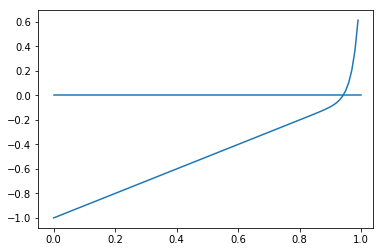

In [34]:
n = 7
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.show()

## Определяем функцию, ее производную и решаем с помощью метода Ньютона (метод касательных)

In [35]:
def f(x):
    return x**(n + 40) + x - 1
def derived_1_f(x):
    return (n+40) * x**(n+39) + 1
def Newton(xo, X, Y):
    e = 10**10
    eps = 10 ** (-8)
    i = 0
    while e > eps:
        x = xo - f(xo)/derived_1_f(xo)
        X = np.append(X, x)
        Y = np.append(Y, f(x))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x, X, Y, i
try:
    X = np.array([])
    Y = np.array([])
    x, X, Y, i = Newton(1, X, Y)
    print('Answer: ' + str(x))
    print("Amount of operations: " + str(i))
except(Exception):
    print("This method does not feel for this equation")

Answer: 0.9414175462465465
Amount of operations: 7


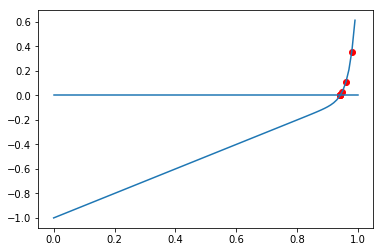

In [36]:
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.scatter(X, Y, color = 'red')
plt.show()

## Теперь метод простых итераций

In [37]:
def f1(x):
    return x**(n+40) + x -1
def fi(x):
    return math.pow(1 - x, 1/(n+40))
def simple_iteration_method(xo, X, Y):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        x = fi(xo)
        X = np.append(X, x)
        Y = np.append(Y, f1(x))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x, X, Y, i
try:
    X = np.array([])
    Y = np.array([])
    x, X, Y, i = simple_iteration_method(0.9, X, Y)
    print('Answer: ' + str(x))
    print("Amount of operations: " + str(i))
except(Exception):
    print("This method does not feel for this equation")

Answer: 0.9414175450639701
Amount of operations: 16


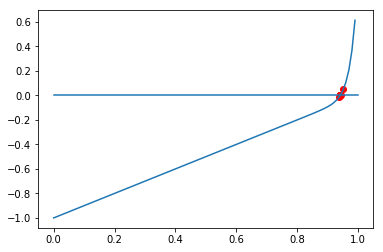

In [38]:
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.scatter(X, Y, color = 'red')
plt.show()

## Метод Ньютона для нескольких уравнений

In [39]:
def function_f(x, y):
    return x**(n+17) + x*y - 1
def function_g(x, y):
    return y**(n+1) + x*y - 1
def derivate_f_x(x, y):
    return (n+17) * x**(n+16) + y
def derivate_f_y(x, y):
    return x
def derivate_g_x(x, y):
    return y
def derivate_g_y(x, y):
    return (n+1) * y**n + x
def Newton_2(xo, X, Y):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        A = np.array([derivate_f_x(xo[0], xo[1]), derivate_f_y(xo[0], xo[1]),
             derivate_g_x(xo[0], xo[1]), derivate_g_y(xo[0], xo[1])]).reshape(2, 2)
        b = -np.array([function_f(xo[0], xo[1]), function_g(xo[0], xo[1])])
        del_x = np.linalg.solve(A, b)
        x = xo + del_x
        e = abs(x - xo).max()
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x, X, Y, i
try:
    X = np.array([])
    Y = np.array([])
    x, X, Y, i = Newton_2(np.array([1, 1]), X, Y)
    print(x)
except(Exception):
    print("This method does not feel for this equation")
        

[0.93919853 0.82846126]
